In [1]:
import pygimli as pg
from pygimli.physics import ert
from pygimli.viewer.mpl import showDataContainerAsMatrix

In [2]:
data = ert.load("GeneralEdGr.txt")
print(data)

31/08/23 - 16:48:42 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


Data: Sensors: 70 data: 6035, nonzero entries: ['a', 'b', 'm', 'n', 'rhoa', 'valid']


In [3]:
data.save("out.dat", "a b m n")

1

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1612d6e1c40>)

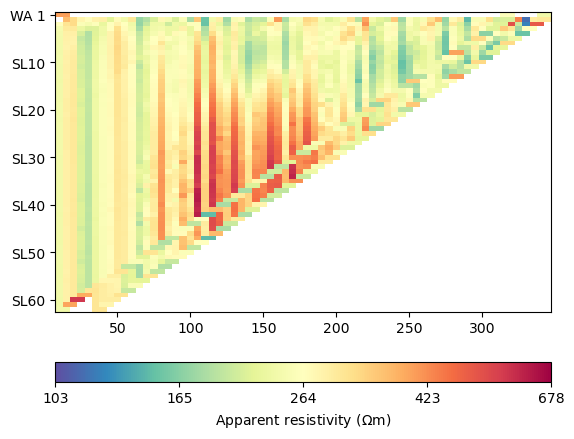

In [4]:
data.remove(data["rhoa"] > 3000)
data.remove(data["rhoa"] < 100)
data.show()

3778 data of 6030 not shown


(<Axes: xlabel='b', ylabel='m'>,
 <matplotlib.colorbar.Colorbar at 0x1612eea0280>)

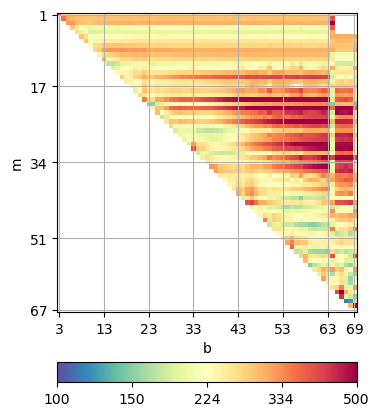

In [5]:
showDataContainerAsMatrix(data, "b", "m", "rhoa", cMin=100, cMax=500, cMap="Spectral_r")

(<Axes: xlabel='b a ', ylabel='m'>,
 <matplotlib.colorbar.Colorbar at 0x1612ef05d30>)

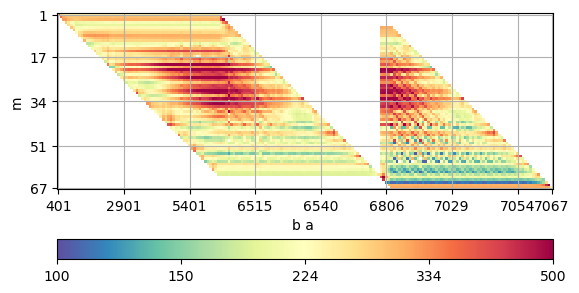

In [6]:
pg.viewer.mpl.showDataContainerAsMatrix(data, ["b", "a"], "m", "rhoa", cMin=100, cMax=500, cMap="Spectral_r")

In [7]:
data.estimateError()
print(max(data["err"]))

31/08/23 - 16:49:12 - pyGIMLi - INFO - Cache c:\Guenther.T\src\gimli\gimli\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 1): C:\Guenther.T\Anwendungsdaten\pygimli\Cache\11006523713602004848


0.03000972138510295


In [13]:
mgr = ert.Manager(data)
mgr.invert(zWeight=0.3, paraDepth=70, robustData=True, verbose=True)

01/09/23 - 08:35:42 - pyGIMLi - INFO - Found 2 regions.
01/09/23 - 08:35:42 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/09/23 - 08:35:42 - pyGIMLi - INFO - Found 2 regions.
01/09/23 - 08:35:42 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/09/23 - 08:35:42 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/09/23 - 08:35:42 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/09/23 - 08:35:42 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2858 Cells: 5364 Boundaries: 4198
01/09/23 - 08:35:42 - pyGIMLi - INFO - Use median(data values)=249.79649999999998
01/09/23 - 08:35:42 - pyGIMLi - INFO - Created startmodel from forward operator: 1077, min/max=249.796500/249.796500
01/09/23 - 08:35:42 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001612D9B38B0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001612D9B39F0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000001612D98EC40>
min/max (data): 103/678
min/max (error): 3%/3%
min/max (start model): 250/250
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 49.39 (dPhi = 51.41%) lam: 20
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 15.05 (dPhi = 48.61%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 7.57 (dPhi = 25.81%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 4.88 (dPhi = 13.0%) lam: 20.0
--------------------------------------------

1077 [240.1482339373479,...,634.648682057623]

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1613fa41d30>)

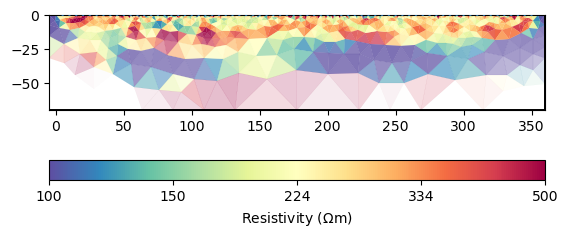

In [14]:
kw = dict(cMin=100, cMax=500, cMap="Spectral_r")
mgr.showResult(**kw)

(<Axes: xlabel='b a ', ylabel='m'>,
 <matplotlib.colorbar.Colorbar at 0x1612d930cd0>)

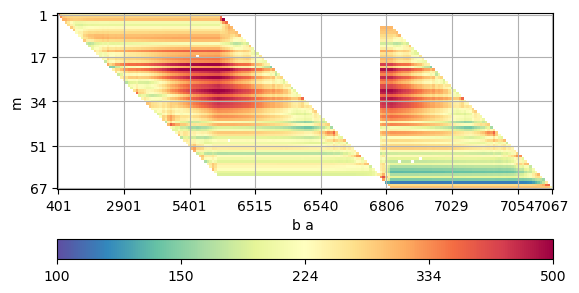

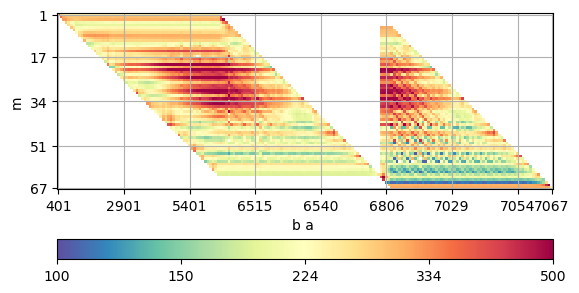

In [12]:
pg.viewer.mpl.showDataContainerAsMatrix(data, ["b", "a"], "m", mgr.inv.response, **kw)
pg.viewer.mpl.showDataContainerAsMatrix(data, ["b", "a"], "m", "rhoa", **kw)